In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagepath = '../1/faces2.jpg'
cascpath = '../xml/haarcascade_frontalface_default.xml'

In [3]:
facecascade = cv2.CascadeClassifier(cascpath)

image = cv2.imread(imagepath)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

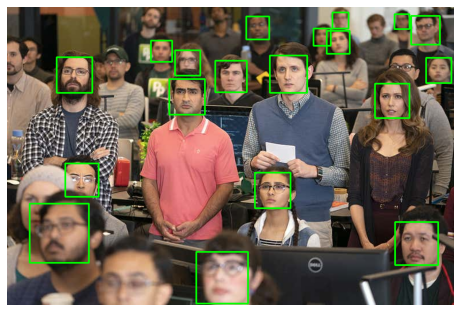

In [4]:
faces = facecascade.detectMultiScale(
    gray,                 #입력 그레이 이미지
    minNeighbors = 5,     # 얼굴 사이의 최소 간격
    minSize = (20, 20)    # 얼굴의 최소 크기
)

for (x, y, w, h) in faces:
    cv2.rectangle(imageRGB, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(imageRGB)

In [9]:
def FaceDetection(image, cascadepath):
    faceimage = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    facecascade = cv2.CascadeClassifier(cascadepath)
    faces = facecascade.detectMultiScale(
        gray,
        minNeighbors = 5,
        minSize = (20, 20)
    )
    
    for (x, y, w, h) in faces:
        cv2.rectangle(faceimage, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return faceimage

In [10]:
cap = cv2.VideoCapture('../1/siliconvalley.mp4')
while True:
    retval, frame = cap.read()
    if not retval:
        break
    face = FaceDetection(frame, cascpath)
    cv2.imshow('face', face)
    
    key = cv2.waitKey(25)
    if key == 27:
        break
    
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()